In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive





# Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Connecting Datasets


In [5]:
full_grouped = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/full_grouped.csv")
covid_19_clean_complete = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/covid_19_clean_complete.csv")
day_wise = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/day_wise.csv") #!!
country_wise_latest = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/country_wise_latest.csv")
usa_county_wise = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/usa_county_wise.csv") #filter!
worldometer_data = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/worldometer_data.csv") #!
country_vaccinations = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/country_vaccinations.csv") #filter
country_vaccinations_by_manufacturer = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/country_vaccinations_by_manufacturer.csv") #!!!
USA_new = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv")
gdp_data = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5994720.csv", delimiter='\t')

In [6]:
print(f"full_grouped {full_grouped.columns}")
print(f"covid_19_clean_complete {covid_19_clean_complete.columns}")
print(f"day_wise {day_wise.columns}")
print(f"country_wise_latest {country_wise_latest.columns}")
print(f"usa_county_wise {usa_county_wise.columns}")
print(f"worldometer_data {worldometer_data.columns}")
print(f"country_vaccinations {country_vaccinations.columns}")
print(f"country_vaccinations_by_manufacturer {country_vaccinations_by_manufacturer.columns}")
print(f"USA_new {USA_new.columns}")
print(f"GDP {gdp_data.columns}")

full_grouped Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')
covid_19_clean_complete Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
day_wise Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')
country_wise_latest Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
usa_county_wise Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS',

# Step 1 (Data Exploration and Visualization)



In [9]:
missing_values = usa_county_wise.isnull().sum()
usa_county_wise.fillna(0, inplace=True)
duplicate_rows = usa_county_wise.duplicated()
# To remove duplicate rows
usa_county_wise = usa_county_wise[~duplicate_rows]
# After cleaning, you can save the cleaned dataset to a new file
usa_county_wise.to_csv("/content/drive/MyDrive/Big_Data_Project/Data/cleaned_usa_county_wise.csv", index=False)
country_vaccinations.fillna(0, inplace=True)
country_vaccinations.drop_duplicates(inplace=True)
country_vaccinations['date'] = pd.to_datetime(country_vaccinations['date'])
country_vaccinations.to_csv("cleaned_country_vaccinations.csv", index=False)
country_vaccinations = country_vaccinations[country_vaccinations['total_vaccinations'] >= 1]
usa_county_wise = usa_county_wise[usa_county_wise['Confirmed'] >= 1]

In [10]:
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# Step 2 (Visualization of Confirmed Cases by Region)

In [12]:
#Merging 2 datasets
full_clean = pd.merge(full_grouped, covid_19_clean_complete, on=['Country/Region', 'Date'], how='inner')
full_clean.head()

,Date,Country/Region,Confirmed_x,Deaths_x,Recovered_x,Active_x,New cases,New deaths,New recovered,WHO Region_x,Province/State,Lat,Long,Confirmed_y,Deaths_y,Recovered_y,Active_y,WHO Region_y
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,NaN,33.93911,67.709953,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,NaN,41.15330,20.168300,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,NaN,28.03390,1.659600,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,NaN,42.50630,1.521800,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,NaN,-11.20270,17.873900,0,0,0,0,Africa


In [13]:
#How to fill missing values in new dataset with NaN using Pandas
full_clean['Province/State'].fillna('Unknown', inplace=True)
#Data Type Conversion
full_clean['Date'] = pd.to_datetime(full_clean['Date'])
#Removing Duplicate Rows
full_clean = full_clean.drop_duplicates()
# Create a dictionary to map old column names to new column names
column_rename_mapping = {
    'Confirmed_x': 'Confirmed',
    'Deaths_x': 'Deaths',
    'Recovered_x': 'Recovered',
    'Active_x': 'Active',
    'New cases': 'NewCases',
    'New deaths': 'NewDeaths',
    'New recovered': 'NewRecovered',
    'WHO Region_x': 'WHO Region',
    'Confirmed_y': 'Confirmed (Cleaned)',
    'Deaths_y': 'Deaths (Cleaned)',
    'Recovered_y': 'Recovered (Cleaned)',
    'Active_y': 'Active (Cleaned)',
    'WHO Region_y': 'WHO Region (Cleaned)'
}
# Use the rename() function to rename the columns based on the mapping
full_clean.rename(columns=column_rename_mapping, inplace=True)
print(full_clean.columns)

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'NewCases', 'NewDeaths', 'NewRecovered', 'WHO Region', 'Province/State',
       'Lat', 'Long', 'Confirmed (Cleaned)', 'Deaths (Cleaned)',
       'Recovered (Cleaned)', 'Active (Cleaned)', 'WHO Region (Cleaned)'],
      dtype='object')


In [14]:
full_clean = full_clean[full_clean["Confirmed"]>=1]

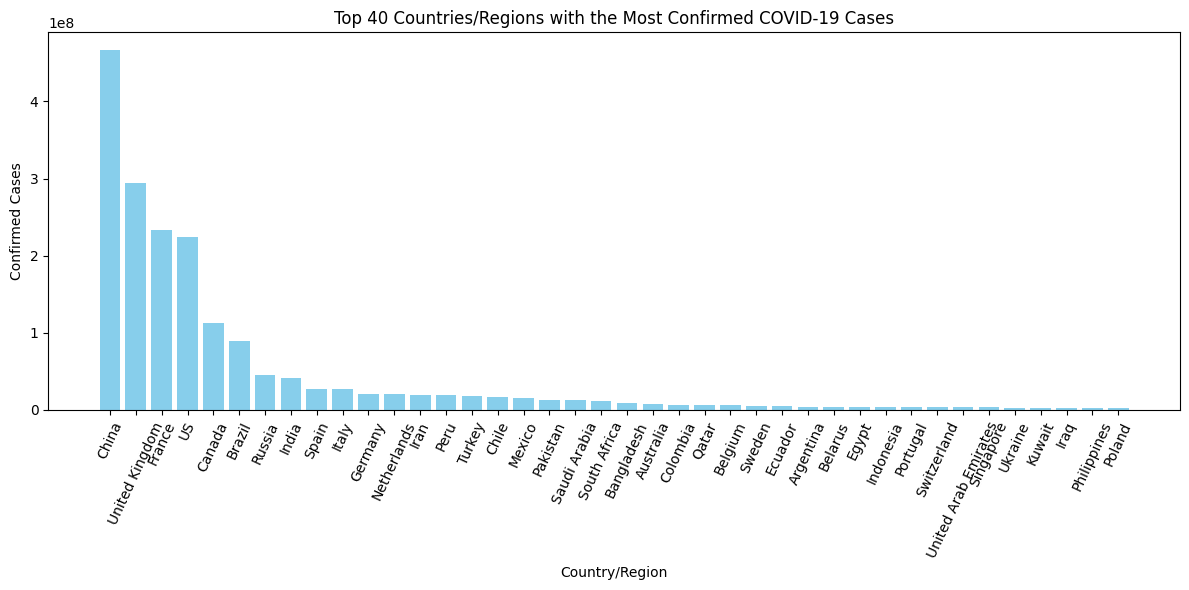

In [15]:
# Group the data by 'Country/Region' and sum the 'Confirmed' cases for each region
confirmed_by_region = full_clean.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_n = 40
# Sort the data in descending order to highlight the regions with the most cases
confirmed_by_region = confirmed_by_region.sort_values(by='Confirmed', ascending=False)
# Filter the top N countries or regions
top_confirmed = confirmed_by_region.head(top_n)

# Create a bar chart to visualize the total number of confirmed cases for the top N countries or regions
plt.figure(figsize=(12, 6))
plt.bar(top_confirmed['Country/Region'], top_confirmed['Confirmed'], color='skyblue')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title(f'Top {top_n} Countries/Regions with the Most Confirmed COVID-19 Cases')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Step 4 (Data Visualization for Trend Analysis)

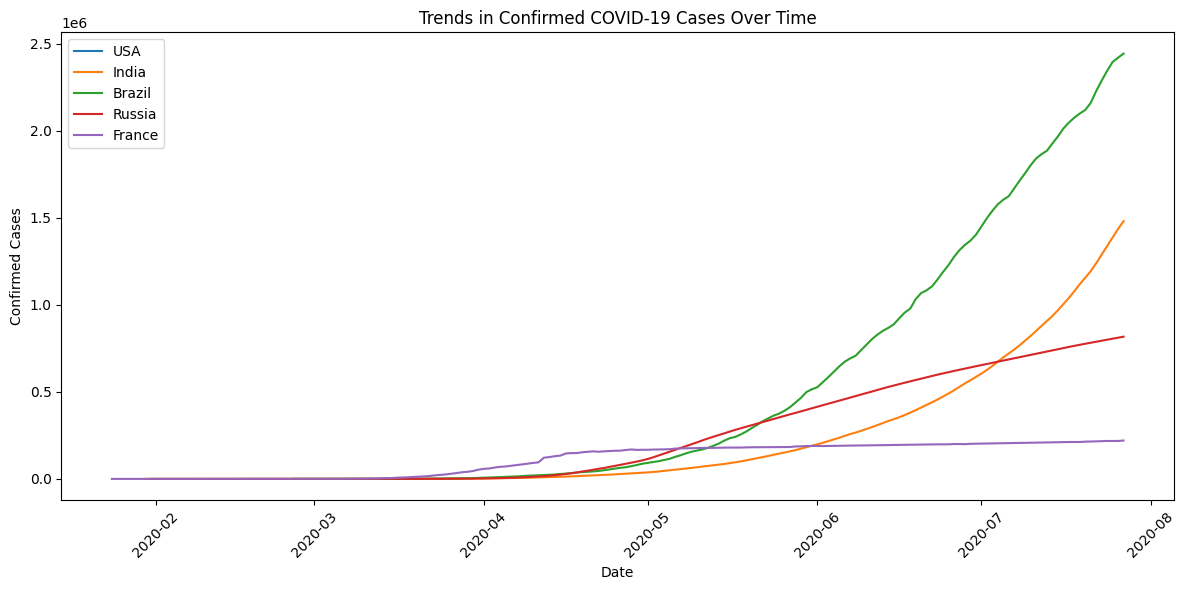

In [16]:
# Create a line chart to visualize the trends in confirmed cases over time for specific countries or regions
countries_to_visualize = ['USA', 'India', 'Brazil', 'Russia', 'France']
plt.figure(figsize=(12, 6))

for country in countries_to_visualize:
    country_data = full_clean[full_clean['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Trends in Confirmed COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5 (Interpretation and Reporting)


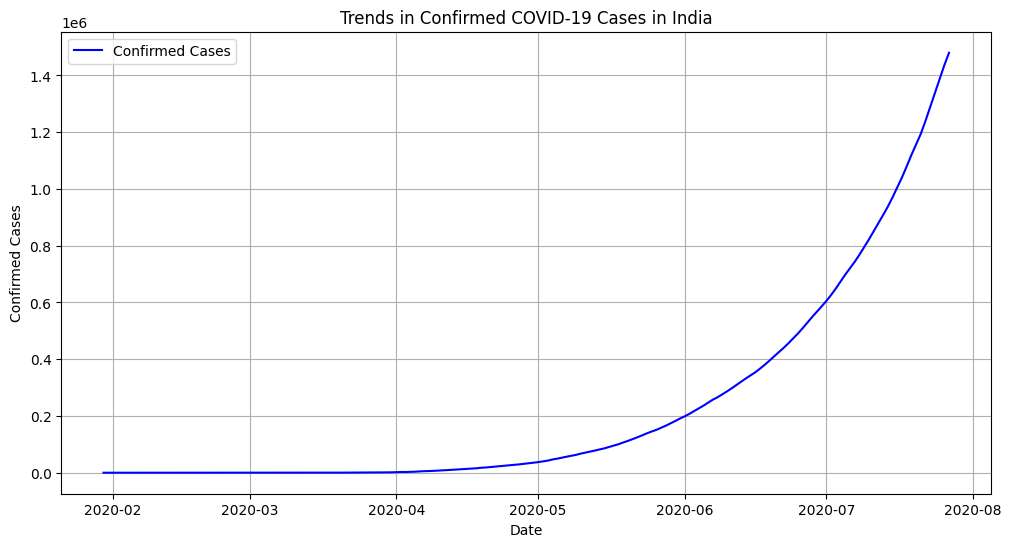

In [17]:
# Filter data for India
india_data = full_clean[full_clean['Country/Region'] == 'India']

# Create a line chart to visualize the trends in confirmed cases for India
plt.figure(figsize=(12, 6))
plt.plot(india_data['Date'], india_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Trends in Confirmed COVID-19 Cases in India')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
full_clean['Daily_New_Cases'] = full_clean.groupby('Country/Region')['Confirmed'].diff().fillna(0)
# Calculate daily new cases
full_grouped['Daily_New_Cases'] = full_grouped.groupby('Country/Region')['Confirmed'].diff().fillna(0)
# Group by continent
grouped_by_continent = full_grouped.groupby(['Country/Region', 'Date', 'WHO Region'])['Confirmed', 'Daily_New_Cases'].sum().reset_index()

<ipython-input-18-27c021142e66>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_continent = full_grouped.groupby(['Country/Region', 'Date', 'WHO Region'])['Confirmed', 'Daily_New_Cases'].sum().reset_index()


In [19]:
# Create an empty DataFrame to store correlations between countries within each group
correlation_data = pd.DataFrame(columns=['Country_A', 'Country_B', 'Correlation', 'Group'])

# Group by the WHO Region and calculate correlations between countries
for group, data in grouped_by_continent.groupby('WHO Region'):
    # Calculate correlations between countries within each group
    countries = data['Country/Region'].unique()
    for i in range(len(countries)):
        for j in range(i + 1, len(countries)):
            Country_A = countries[i]
            Country_B = countries[j]
            correlations = data[data['Country/Region'].isin([Country_A, Country_B])]['Daily_New_Cases']
            correlation_value = correlations.corr(correlations.shift())

            # Filter for pairs with high positive correlations
            if correlation_value > 0.8:
                correlation_data = correlation_data.append({
                    'Country_A': Country_A,
                    'Country_B': Country_B,
                    'Correlation': correlation_value,
                    'Group': group
                }, ignore_index=True)

# Display pairs of similar countries with high positive correlations
print(correlation_data)

<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({
<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({
<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({
<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({
<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

        Country_A     Country_B  Correlation            Group
0         Algeria        Angola     0.967642           Africa
1         Algeria         Benin     0.952835           Africa
2         Algeria      Botswana     0.963856           Africa
3         Algeria  Burkina Faso     0.967746           Africa
4         Algeria       Burundi     0.967707           Africa
...           ...           ...          ...              ...
2022    Singapore   South Korea     0.903784  Western Pacific
2023    Singapore       Taiwan*     0.917913  Western Pacific
2024    Singapore       Vietnam     0.917903  Western Pacific
2025  South Korea       Taiwan*     0.913237  Western Pacific
2026  South Korea       Vietnam     0.913044  Western Pacific

[2027 rows x 4 columns]


<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({
<ipython-input-19-6d8c348d3542>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_data = correlation_data.append({


In [20]:
# Read the GDP dataset into a DataFrame
gdp_data = pd.read_csv("/content/drive/MyDrive/Big_Data_Project/Data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5994720.csv", skiprows=4)

# Rename the columns
gdp_data.columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"] + list(gdp_data.columns[4:])

print(gdp_data)

                    Country Name Country Code                Indicator Name  \
0                          Aruba          ABW  GDP per capita (current US$)   
1    Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                    Afghanistan          AFG  GDP per capita (current US$)   
3     Africa Western and Central          AFW  GDP per capita (current US$)   
4                         Angola          AGO  GDP per capita (current US$)   
..                           ...          ...                           ...   
261                       Kosovo          XKX  GDP per capita (current US$)   
262                  Yemen, Rep.          YEM  GDP per capita (current US$)   
263                 South Africa          ZAF  GDP per capita (current US$)   
264                       Zambia          ZMB  GDP per capita (current US$)   
265                     Zimbabwe          ZWE  GDP per capita (current US$)   

     Indicator Code        1960        1961        

In [21]:
# Choose the relevant columns from the GDP dataset and rename them
gdp_data = gdp_data[['Country Name', 'Country Code', '2020']]
gdp_data.rename(columns={'Country Name': 'Country/Region', '2020': 'GDP per capita (2020)'}, inplace=True)

# Merge the GDP data with COVID-19 data
merged_data = pd.merge(full_grouped, gdp_data, on='Country/Region', how='left')

# Display the merged data
print(merged_data)

             Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered        

<ipython-input-21-47ab2723caae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data.rename(columns={'Country Name': 'Country/Region', '2020': 'GDP per capita (2020)'}, inplace=True)


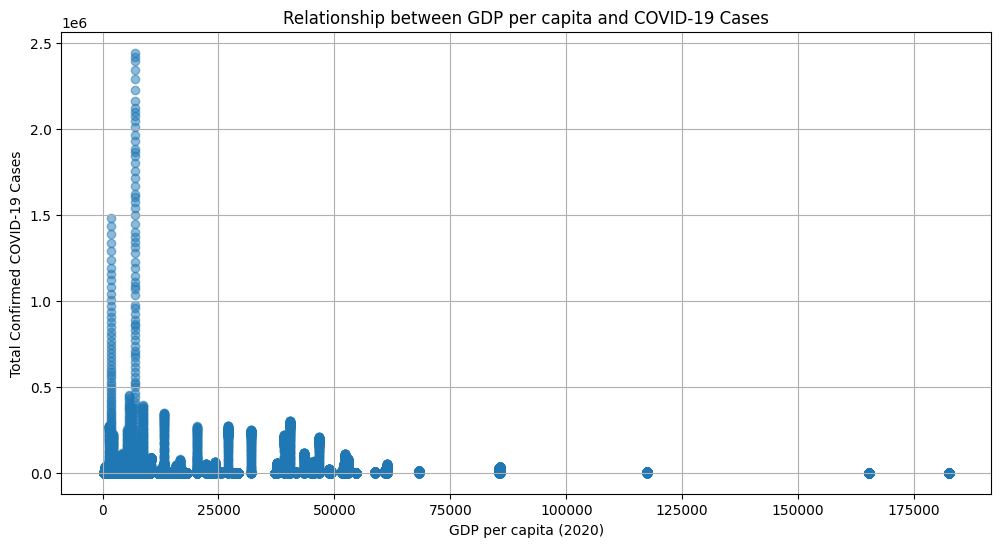

In [22]:
# Example: Create a scatter plot to visualize the relationship between GDP per capita and COVID-19 cases
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['GDP per capita (2020)'], merged_data['Confirmed'], alpha=0.5)
plt.xlabel('GDP per capita (2020)')
plt.ylabel('Total Confirmed COVID-19 Cases')
plt.title('Relationship between GDP per capita and COVID-19 Cases')
plt.grid()
plt.show()


<ipython-input-23-a5698846b6e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = full_clean.corr()


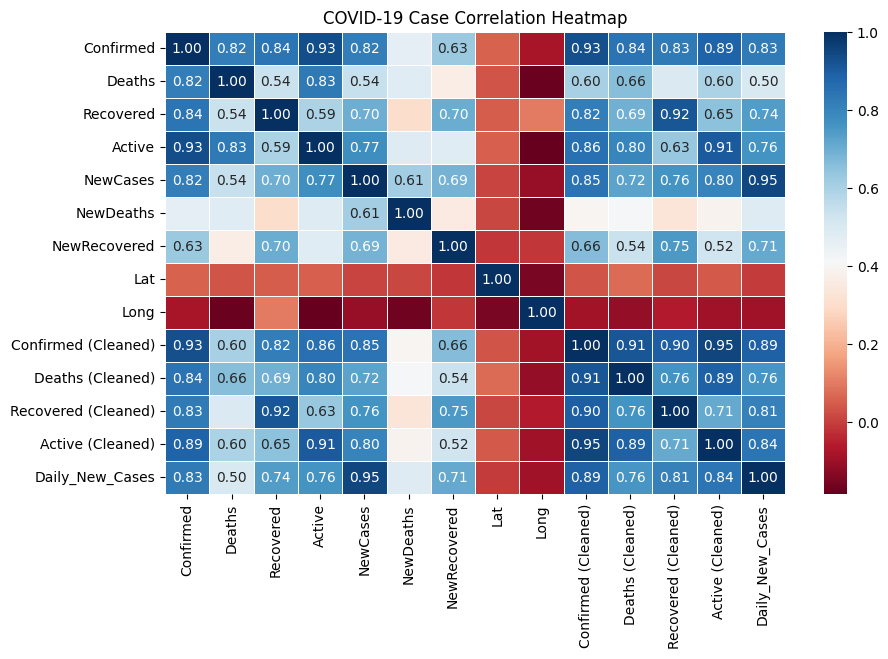

In [23]:
# Assuming df is your DataFrame with relevant columns
correlation_matrix = full_clean.corr()

# Define the format_annotation function
def format_annotation(value):
    if abs(value) > 0.5:
        return f"{value:.2f}"
    else:
        return ""

# Now, proceed with the visualization code
annotations = pd.DataFrame([[format_annotation(correlation_matrix.iloc[i, j]) for j in range(len(correlation_matrix.columns))]
                            for i in range(len(correlation_matrix.index))])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=annotations, cmap='RdBu', fmt='s', linewidths=0.5)
plt.title('COVID-19 Case Correlation Heatmap')
plt.show()


In [24]:
# Drop rows with missing values
merged_data.dropna(subset=['GDP per capita (2020)'], inplace=True)

# Prepare the data
X = merged_data[['GDP per capita (2020)']]
y = merged_data['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 26045.44
Mean Squared Error (MSE): 6198123303.57
R-squared (R2) Score: 0.00


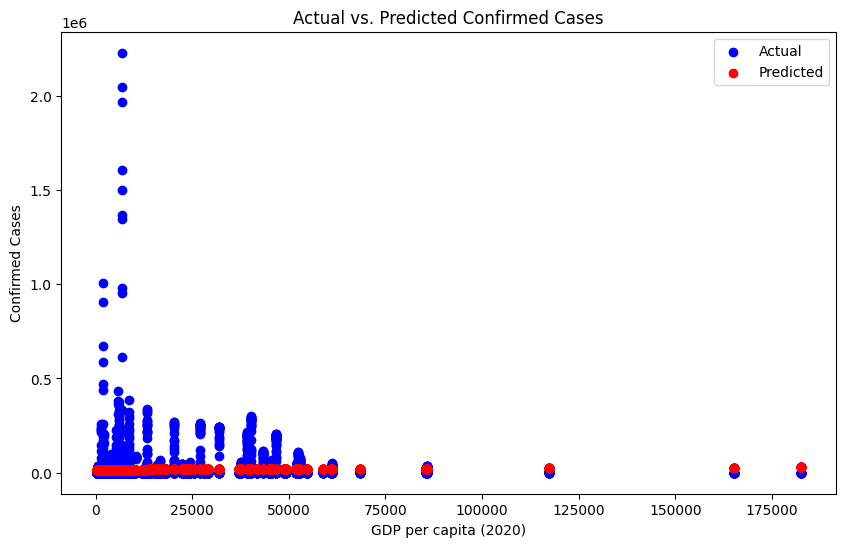

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('GDP per capita (2020)')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.title('Actual vs. Predicted Confirmed Cases')
plt.show()

In [27]:
# Step 1: Calculate the percentage increase in confirmed cases for each country
full_clean['Percentage Increase'] = full_clean.groupby('Country/Region')['Confirmed'].pct_change() * 100

# Step 2: Identify the country with the lowest percentage increase
lowest_increase_country = full_clean[full_clean['Percentage Increase'] == full_clean['Percentage Increase'].min()]

# Display information about the country with the lowest increase
print("Country with the Lowest Increase:")
print(lowest_increase_country[['Country/Region', 'Percentage Increase']])


Country with the Lowest Increase:
      Country/Region  Percentage Increase
16316         Guyana                -75.0


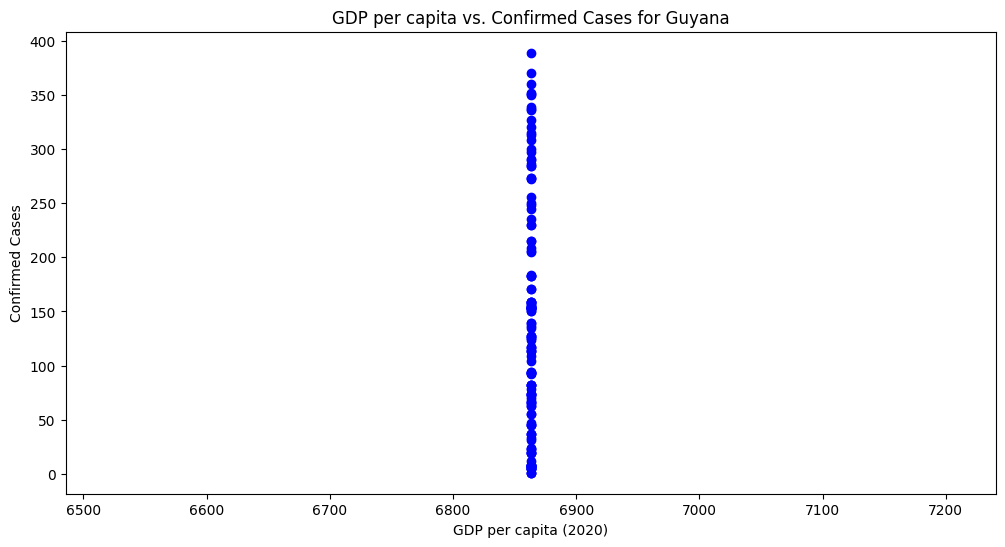

In [28]:
# Merge GDP data with the main dataset
full_clean = pd.merge(full_clean, gdp_data[['Country/Region', 'GDP per capita (2020)']], on='Country/Region', how='left')

# Visualize GDP per capita vs. Confirmed Cases for Guyana
guyana_data = full_clean[full_clean['Country/Region'] == 'Guyana']

plt.figure(figsize=(12, 6))
plt.scatter(guyana_data['GDP per capita (2020)'], guyana_data['Confirmed'], color='blue')
plt.xlabel('GDP per capita (2020)')
plt.ylabel('Confirmed Cases')
plt.title('GDP per capita vs. Confirmed Cases for Guyana')
plt.show()

In [29]:
print("Columns in gdp_data:", gdp_data.columns)

Columns in gdp_data: Index(['Country/Region', 'Country Code', 'GDP per capita (2020)'], dtype='object')


In [30]:
print(guyana_data)

            Date Country/Region  Confirmed  Deaths  Recovered  Active  \
5512  2020-03-12         Guyana          1       1          0       0   
5702  2020-03-13         Guyana          1       1          0       0   
5900  2020-03-14         Guyana          1       1          0       0   
6110  2020-03-15         Guyana          4       1          0       3   
6324  2020-03-16         Guyana          4       1          0       3   
...          ...            ...        ...     ...        ...     ...   
39553 2020-07-23         Guyana        351      19        176     156   
39814 2020-07-24         Guyana        352      20        178     154   
40075 2020-07-25         Guyana        360      20        180     160   
40336 2020-07-26         Guyana        370      20        181     169   
40597 2020-07-27         Guyana        389      20        181     188   

       NewCases  NewDeaths  NewRecovered WHO Region  ...       Lat      Long  \
5512          1          1             0   

The provided code generates scatter plots for selected countries,
illustrating the relationship between GDP per capita and the number of confirmed COVID-19 cases. 


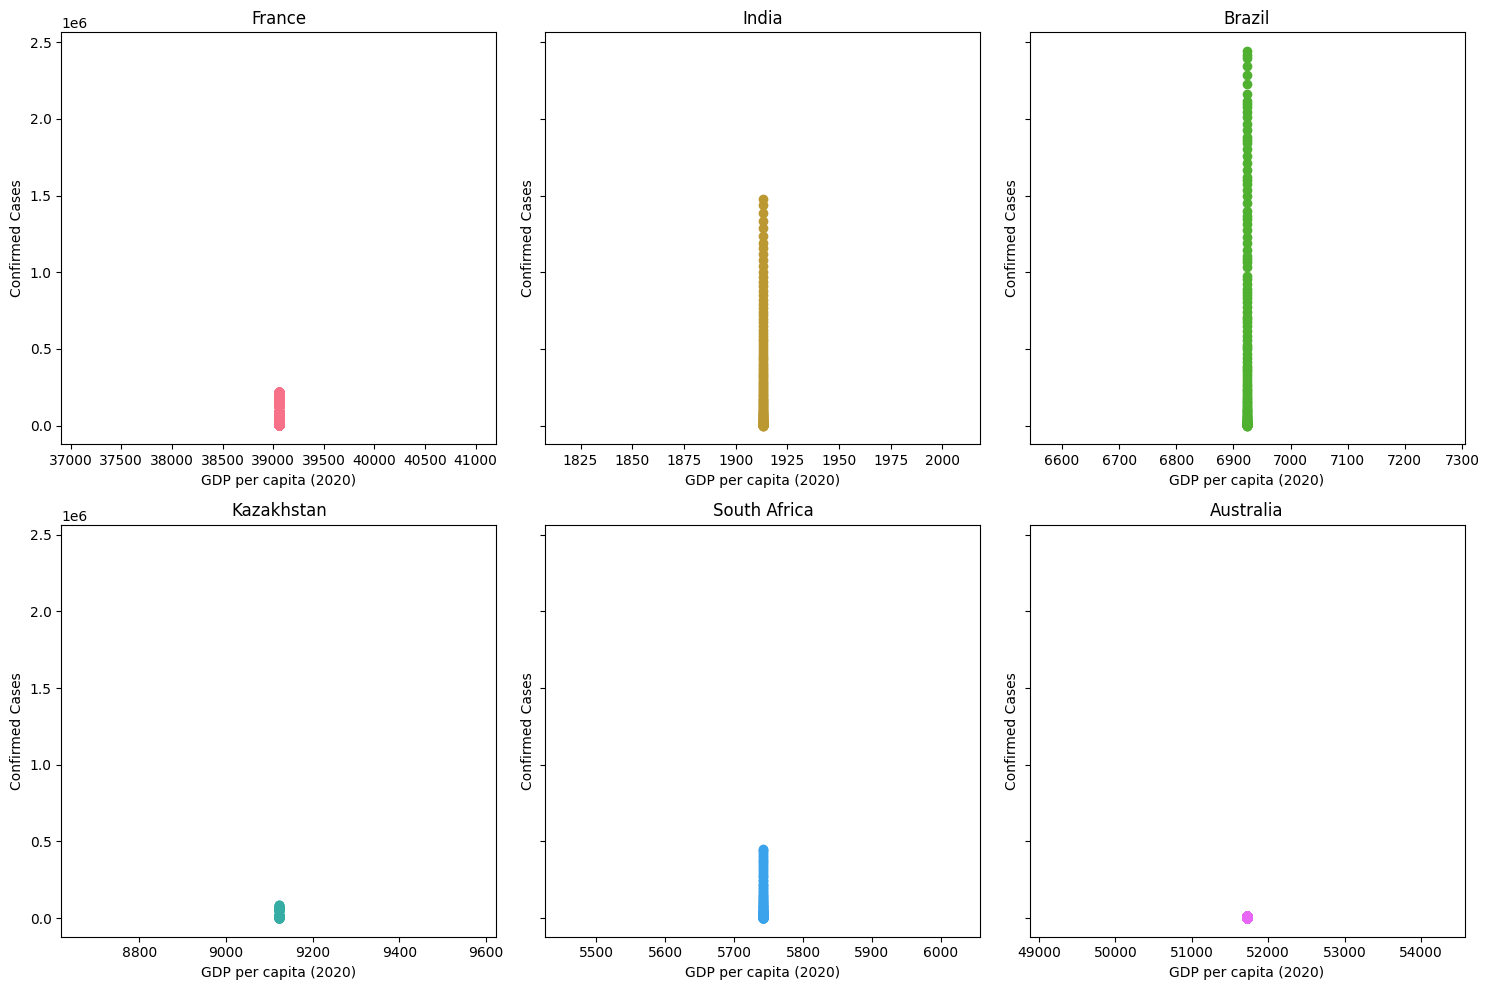

In [33]:
# List of countries to analyze
countries_to_analyze = ['France', 'India', 'Brazil', 'Kazakhstan', 'South Africa', 'Australia']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

# Define a color palette for the countries
colors = sns.color_palette('husl', n_colors=len(countries_to_analyze))

for i, (country, color) in enumerate(zip(countries_to_analyze, colors)):
    row, col = divmod(i, 3)
    ax = axes[row, col]

    # Filter data for the specific country
    country_data = full_clean[full_clean['Country/Region'] == country]

    # Plotting
    ax.scatter(
        country_data['GDP per capita (2020)'],
        country_data['Confirmed'],
        label=country,
        color=color  # Use the specified color for each country
    )

    ax.set_title(country)
    ax.set_xlabel('GDP per capita (2020)')
    ax.set_ylabel('Confirmed Cases')

plt.tight_layout()
print("The provided code generates scatter plots for selected countries,")
print("illustrating the relationship between GDP per capita and the number of confirmed COVID-19 cases. ")
plt.show()

In [34]:
# Assuming full_clean is the relevant DataFrame with 'GDP per capita (2020)' and 'Confirmed' columns
X = full_clean[['GDP per capita (2020)']]
y = full_clean['Confirmed']

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 56748.59
Mean Squared Error (MSE): 15461414707.12
R-squared (R2) Score: 0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 6 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              43486 non-null  object        
 1   iso_code                             43486 non-null  object        
 2   date                                 43486 non-null  datetime64[ns]
 3   total_vaccinations                   43486 non-null  float64       
 4   people_vaccinated                    43486 non-null  float64       
 5   people_fully_vaccinated              43486 non-null  float64       
 6   daily_vaccinations_raw               43486 non-null  float64       
 7   daily_vaccinations                   43486 non-null  float64       
 8   total_vaccinations_per_hundred       43486 non-null  float64       
 9   people_vaccinated_per_hundred        43486 non-null  float64       
 10  people_ful

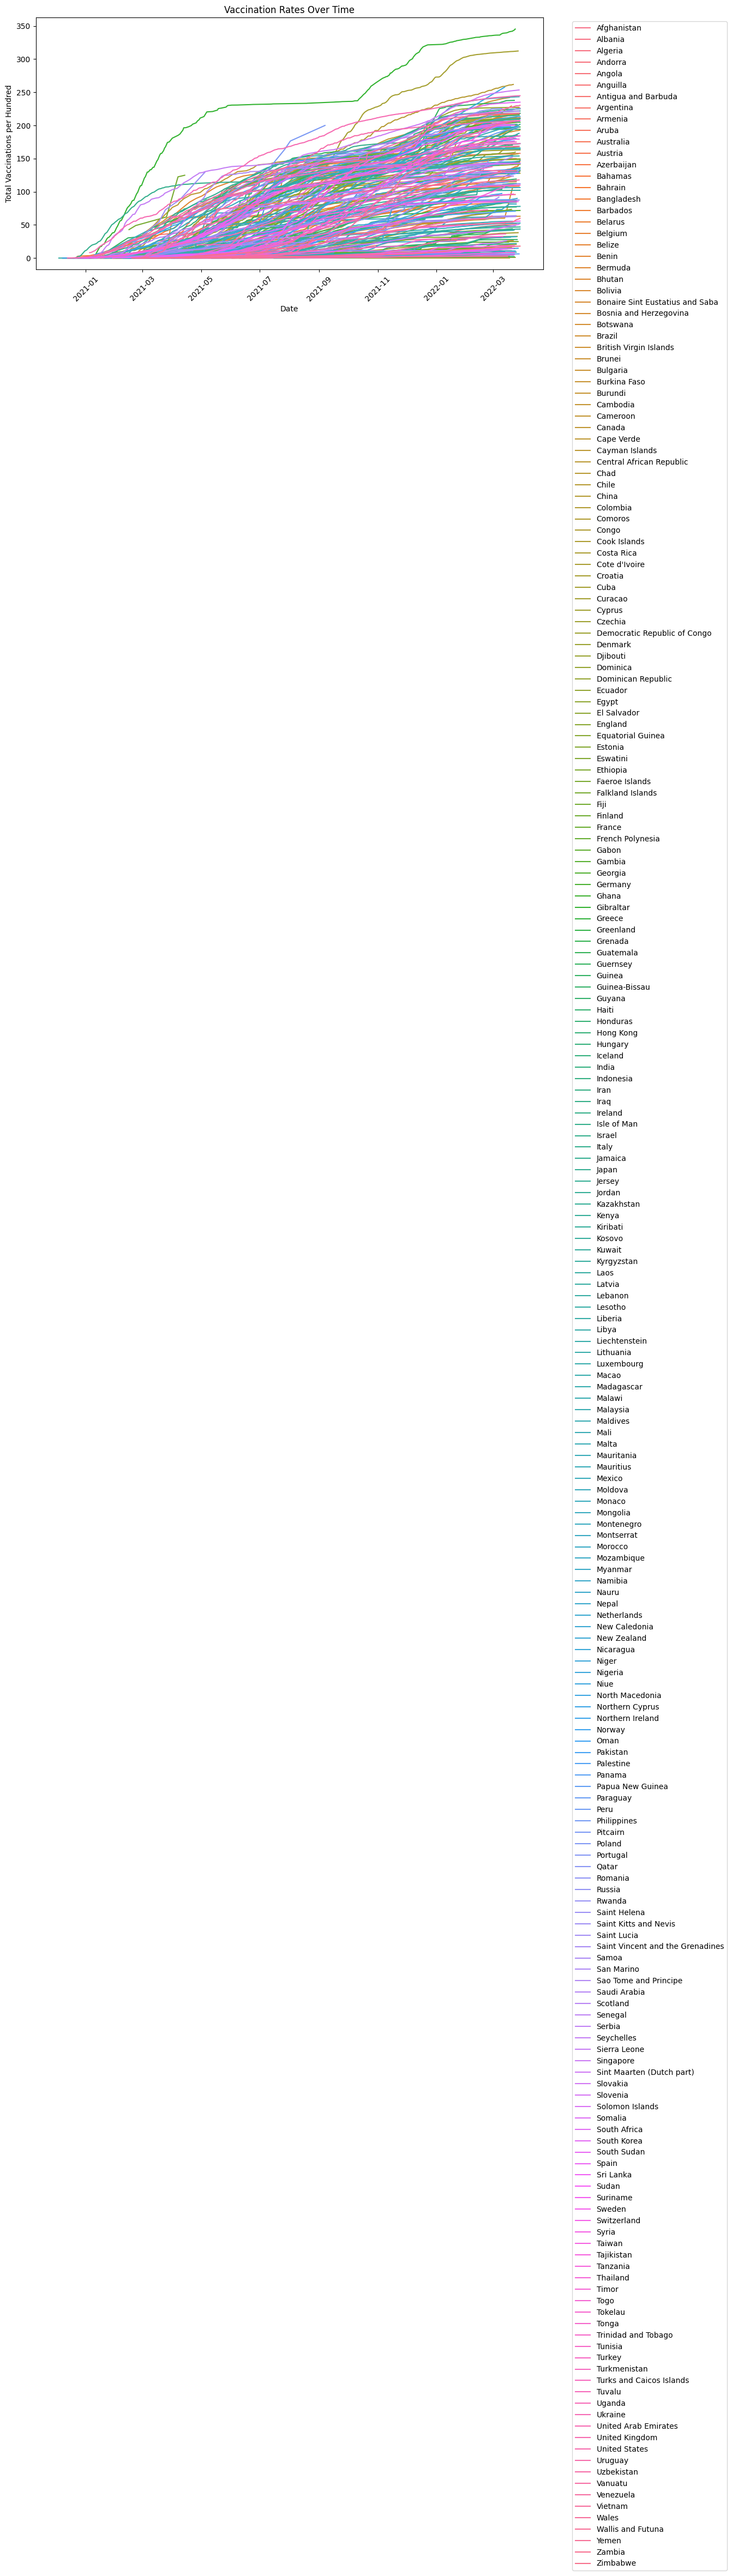

In [35]:
# Assuming 'country_vaccinations' is your DataFrame
# Check the structure of the dataset
print(country_vaccinations.info())
# Visualize the vaccination rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_vaccinations_per_hundred', hue='country', data=country_vaccinations)
plt.title('Vaccination Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations per Hundred')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
print(len(country_vaccinations['country'].unique()))

223
